<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/DataPrep/Example_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


df = pd.DataFrame({
    'gender': np.random.binomial(1,0.6,100),
    'height': np.random.normal(0,10,100),
    'noise': np.random.normal(0,2,100)
})
df['height'] = df['height'] + df['gender'].apply(lambda g: 150 if g else 180)
df['height (with 75% NaN)'] = df['height'].apply(lambda x: x if np.random.binomial(1,0.25,1)[0] else np.nan)
df['weight'] = df['height'] + df['noise'] - 110
df.isnull().mean()

gender                   0.00
height                   0.00
noise                    0.00
height (with 75% NaN)    0.73
weight                   0.00
dtype: float64

290.6380075453595


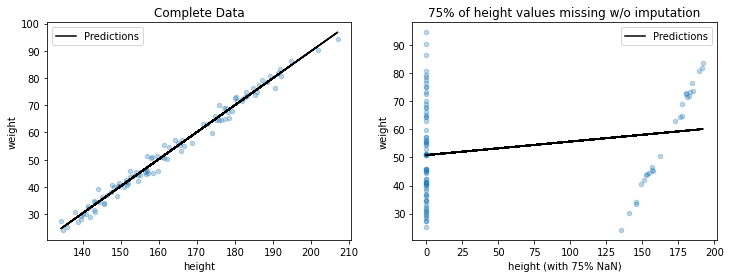

In [ ]:
df['height (with 75% NaN)'] = df['height (with 75% NaN)'].fillna(0)

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

reg = Ridge()
x, y = df[['height (with 75% NaN)']], df['weight']
reg.fit(x,y)
print(mean_squared_error(y, reg.predict(x)))

reg1 = LinearRegression()
x1,y1 = df[['height']], df['weight']
reg1.fit(x1,y1)
df['reg_pred'] = reg1.predict(df[['height']])
x2 = df[['height (with 75% NaN)']]
reg1.fit(x2,y1)
df['reg_pred_m'] = reg1.predict(df[['height (with 75% NaN)']])

fig,axs = plt.subplots(1,2,figsize=(12,4))
df.plot(kind='scatter',x='height',y='weight',ax=axs[0], alpha=0.3)
df.plot(title='Complete Data', kind='line', x='height', y='reg_pred',
        color='k', label='Predictions', ax=axs[0])
df.plot(kind='scatter',x='height (with 75% NaN)',y='weight',ax=axs[1], alpha=0.3)
df.plot(title='75% of height values missing w/o imputation', kind='line', 
        x='height (with 75% NaN)', y='reg_pred_m', color='k', label='Predictions', ax=axs[1])
fig.show()

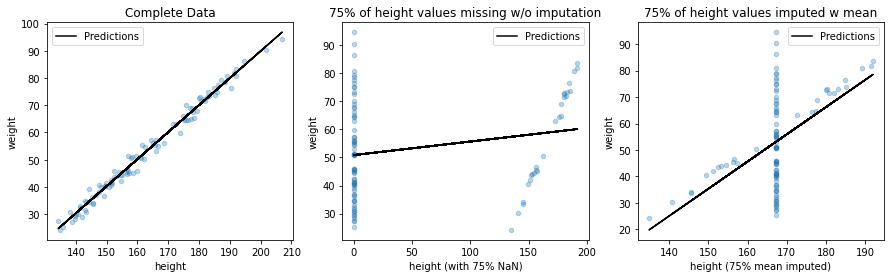

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=0, strategy='mean')
df['height (75% mean imputed)'] = imp.fit_transform(df[['height (with 75% NaN)']])[:,0]
rig = Ridge()
x, y = df[['height (75% mean imputed)']], df['weight']
rig.fit(x,y)
mean_squared_error(y, rig.predict(x))
df['rig_pred'] = rig.predict(df[['height (75% mean imputed)']])

fig,axs = plt.subplots(1,3,figsize=(15,4))
df.plot(kind='scatter',x='height',y='weight',ax=axs[0], alpha=0.3)
df.plot(title='Complete Data', kind='line', x='height', y='reg_pred',
        color='k', label='Predictions', ax=axs[0])
df.plot(kind='scatter',x='height (with 75% NaN)',y='weight',ax=axs[1], alpha=0.3)
df.plot(title='75% of height values missing w/o imputation', kind='line', 
        x='height (with 75% NaN)', y='reg_pred_m', color='k', label='Predictions', ax=axs[1])
df.plot(kind='scatter',x='height (75% mean imputed)',y='weight',ax=axs[2], alpha=0.3)
df.plot(title='75% of height values imputed w mean', kind='line', 
        x='height (75% mean imputed)', y='rig_pred', color='k', label='Predictions', ax=axs[2])
fig.show()

78.51604398854215


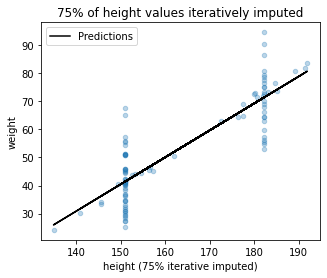

In [ ]:
# Use iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# To use iterative imputer the missing values must be np.nan
imp = IterativeImputer(missing_values=np.nan)
df['height NaN'] = df['height (with 75% NaN)'].apply(lambda x: x if x != 0 else np.nan)
df['height (75% iterative imputed)'] = imp.fit_transform(df[['height NaN', 'gender']])[:,0]

x, y = df[['height (75% iterative imputed)']], df['weight']
rig.fit(x,y)
print(mean_squared_error(y, rig.predict(x)))
df['y_iter_pred'] = rig.predict(x)

fig,ax = plt.subplots(1,1,figsize=(5,4))
df.plot(kind='scatter',x='height (75% iterative imputed)',y='weight',ax=ax, alpha=0.3)
df.plot(title='75% of height values iteratively imputed', kind='line', 
        x='height (75% iterative imputed)', y='y_iter_pred',
        color='k', label='Predictions', ax=ax)
fig.show()


In [ ]:
pip install category_encoders

In [ ]:
# Encoding non-numerical columns using OneHot encoding
from sklearn.model_selection import train_test_split
from category_encoders.one_hot import OneHotEncoder

df = pd.DataFrame({
    'Size': np.random.choice(['XS','S','M','L','XL','XXL'], 10),
    'Brand': np.random.choice(['Nike','Puma','Adidas','Le Coq', 'Reebok'], 10)
})
df_train, df_test = train_test_split(df, test_size=0.5)
encoder = OneHotEncoder(use_cat_names=True, handle_unknown='return_nan')
x_train = encoder.fit_transform(df_train)
x_test = encoder.fit_transform(df_test)

print(x_train.head(5))
print('-------------')
print(x_test.head(5))

   Size_XL  Size_XS  Size_XXL  Size_S  Brand_Reebok  Brand_Puma
5      1.0      0.0       0.0     0.0           1.0         0.0
4      0.0      1.0       0.0     0.0           0.0         1.0
7      0.0      0.0       1.0     0.0           1.0         0.0
2      0.0      0.0       0.0     1.0           1.0         0.0
9      0.0      0.0       0.0     1.0           0.0         1.0
-------------
   Size_S  Size_L  Size_XXL  ...  Brand_Le Coq  Brand_Puma  Brand_Adidas
8     1.0     0.0       0.0  ...           0.0         0.0           0.0
1     0.0     1.0       0.0  ...           1.0         0.0           0.0
0     0.0     1.0       0.0  ...           0.0         1.0           0.0
3     0.0     0.0       1.0  ...           0.0         0.0           1.0
6     0.0     0.0       0.0  ...           0.0         0.0           1.0

[5 rows x 8 columns]


In [ ]:
from category_encoders.ordinal import OrdinalEncoder

oencoder = OrdinalEncoder(
    mapping=[
             {
                 'col': 'Size',
                 'mapping': {'XS':1, 'S':2, 'M':3, 'L':4, 'XL':5}
             }
    ]
)
print(df_train)
df_train.loc[:,'Size [Ordinal Encoded]'] = oencoder.fit_transform(df_train['Size'])['Size'].values
df_train
#df_test.loc[:,'Size [Ordinal Encoded]' = oencoder.transform(df_test['Size'])['Size'].values

  Size   Brand
5   XL  Reebok
4   XS    Puma
7  XXL  Reebok
2    S  Reebok
9    S    Puma


,Size,Brand,Size [Ordinal Encoded]
5,XL,Reebok,5.0
4,XS,Puma,1.0
7,XXL,Reebok,-1.0
2,S,Reebok,2.0
9,S,Puma,2.0


In [ ]:
# scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

scaler = MinMaxScaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

scaler = RobustScaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Feature selection
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

df_train, df_test = train_test_split(df, test_size=0.4)
x_train = df_train[wine.feature_names]
x_test = df_test[wine.feature_names]

y_train = df_train['target']
y_test = df_test['target']

vt = VarianceThreshold(threshold=0)
vt.fit(x_train)

print(wine.feature_names)

x_train = x_train.iloc[:, vt.get_support()]
x_test = x_test.iloc[:, vt.get_support()]

pd.DataFrame({
    'Feature': wine.feature_names,
    'Variance': vt.variances_
}).sort_values('Variance', ascending=True)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,Feature,Variance
7,nonflavanoid_phenols,0.014707
10,hue,0.054051
2,ash,0.082608
8,proanthocyanins,0.251672
5,total_phenols,0.363765
11,od280/od315_of_diluted_wines,0.485547
0,alcohol,0.641447
6,flavanoids,0.971237
1,malic_acid,1.148530
9,color_intensity,5.841735
